In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# Show the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Clustering Algorithm Implementation

A) KMeans Clustering

Description: KMeans clustering partitions data into k clusters where each data point belongs to the cluster with the nearest mean. 

The algorithm works as follows:
Initialize k cluster centroids randomly.
Assign each data point to the nearest centroid.
Recalculate the centroids based on the current cluster memberships.
Repeat steps 2 and 3 until convergence (i.e., centroids do not change significantly).

Suitability: KMeans clustering is suitable for the Iris dataset because it can effectively find distinct clusters in the dataset with a clear separation between them, assuming the dataset has a spherical distribution of clusters.

C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

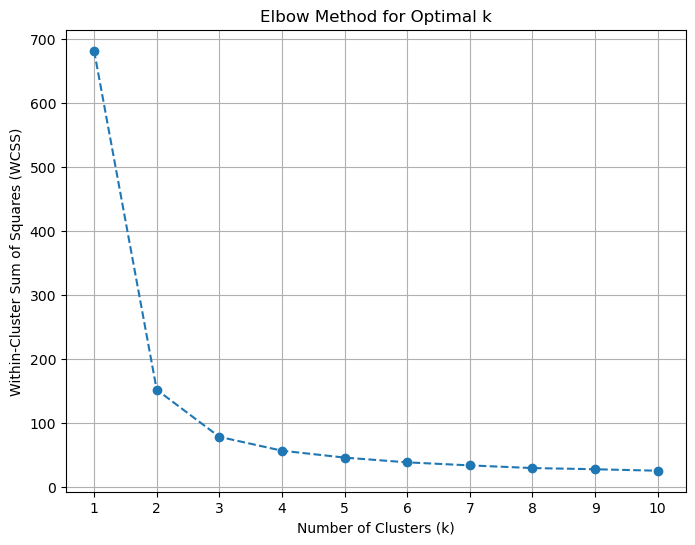

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to test
k_values = range(1, 11)  # Test for k from 1 to 10
wcss = []  # List to store the WCSS values

# Compute KMeans clustering for each k value and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()



C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sheej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


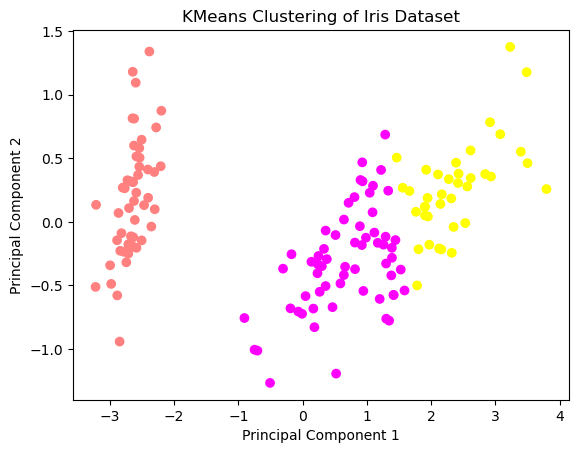

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# From the plot, let's assume the optimal number of clusters is 3 (as in the Iris dataset)
optimal_k = 3

# Step 2: Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the KMeans clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='spring', marker='o')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# B) Hierarchical Clustering

Description: Hierarchical clustering creates a hierarchy of clusters either by:

Agglomerative: Starting with each data point as a separate cluster and merging the closest pairs of clusters.
Divisive: Starting with all data points in one cluster and recursively splitting them.

Suitability: Hierarchical clustering is suitable for the Iris dataset as it can reveal the nested structure of the data and does not require specifying the number of clusters upfront. It provides a dendrogram which can help in determining the number of clusters.

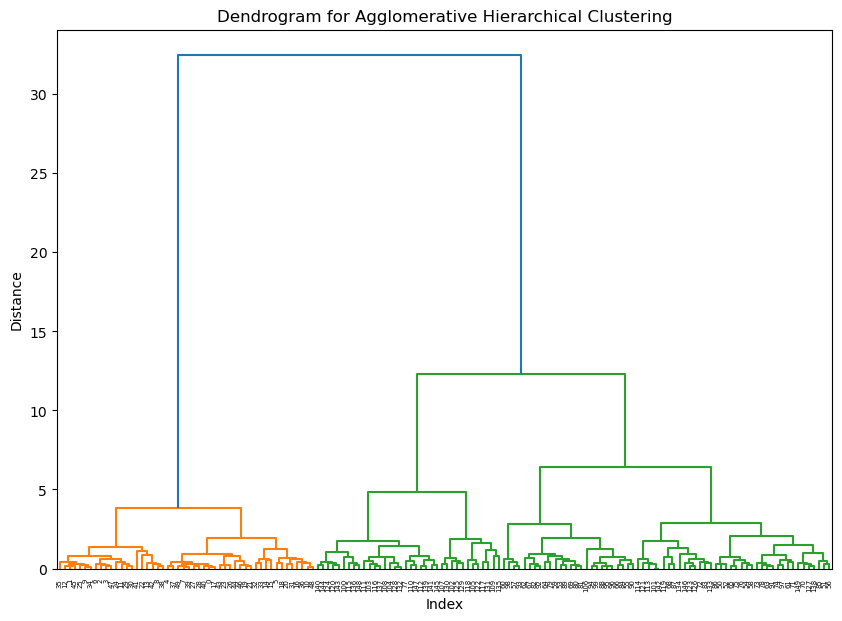

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Hierarchical Clustering
n_clusters = 3  # Number of clusters, similar to the number of species in the Iris dataset
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative_labels = agglomerative.fit_predict(X)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()



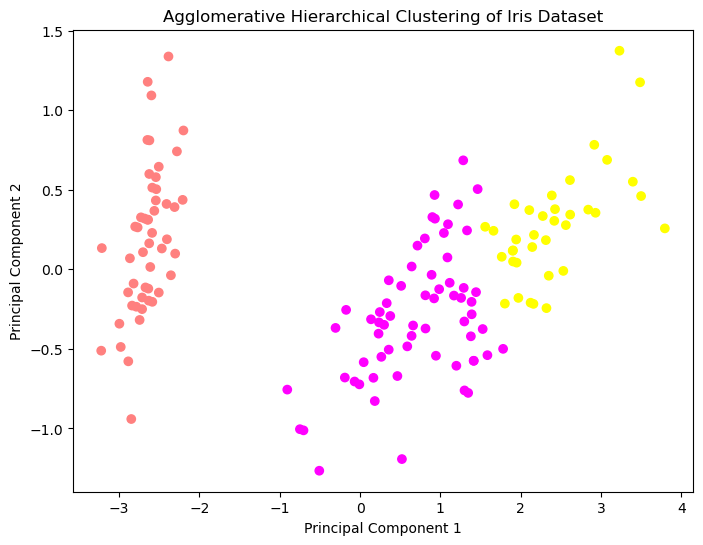

In [15]:
# Plotting the Agglomerative Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='spring', marker='o')
plt.title('Agglomerative Hierarchical Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()